In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# Step 1: Load Dataset
digits = load_digits()
X, y = digits.data, digits.target   # X: pixel features, y: digit labels (0–9)

print("Dataset shape:", X.shape)  # (1797, 64) → 8x8 pixel images


Dataset shape: (1797, 64)


In [3]:
# Step 2: Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # SVM works better with standardized data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [4]:
# Step 3: Train SVM Classifier
# RBF kernel is default and works well for image data
svm_clf = SVC(kernel="rbf", C=10, gamma=0.001)
svm_clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

Test Accuracy: 0.9805555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



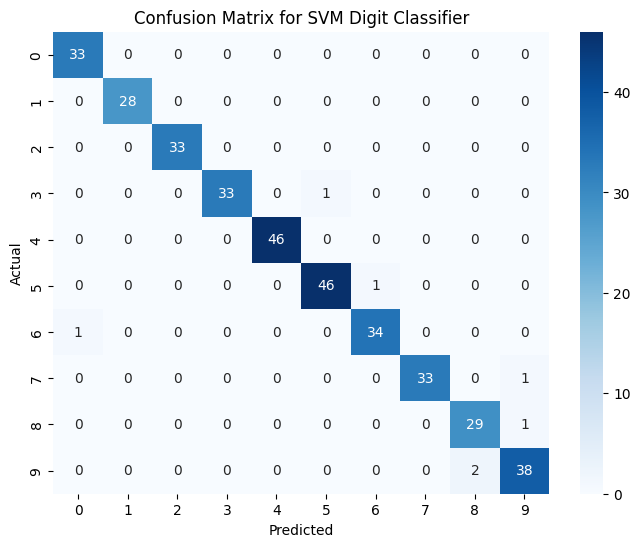

In [5]:
# Step 4: Predictions & Evaluation
y_pred = svm_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Digit Classifier")
plt.show()
